<a href="https://colab.research.google.com/github/Gade-Sai-Likhitha/Bitcoin_Prediction/blob/main/Bitcoin_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/bitcoin_dataset.csv')
test = pd.read_csv('/content/test_set.csv')

In [ ]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [ ]:
data.shape

(2906, 24)

In [ ]:
data.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [ ]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344255e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866150e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [ ]:
num_missing = data.isnull().sum()
num_missing[num_missing >0]

btc_total_bitcoins              27
btc_trade_volume                21
btc_blocks_size                 29
btc_median_confirmation_time    12
btc_difficulty                  16
btc_transaction_fees            10
dtype: int64

<Axes: >

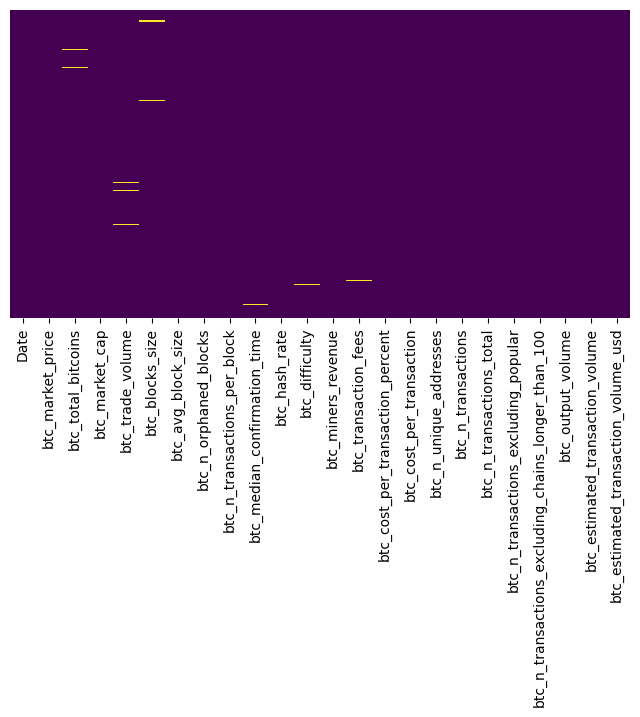

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


Text(0.5, 1.0, 'btc_blocks_size')

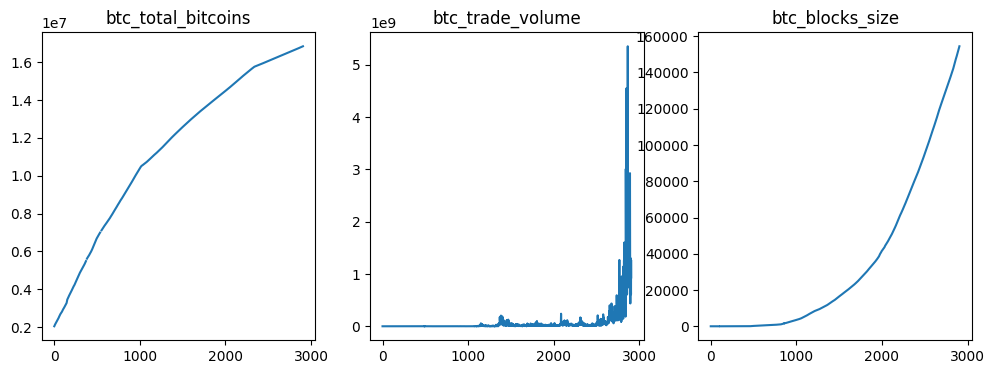

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(data['btc_total_bitcoins'])
axes[0].set_title("btc_total_bitcoins")

axes[1].plot(data['btc_trade_volume'])
axes[1].set_title("btc_trade_volume")

axes[2].plot(data['btc_blocks_size'])
axes[2].set_title("btc_blocks_size")


Text(0.5, 1.0, 'btc_transaction_fees')

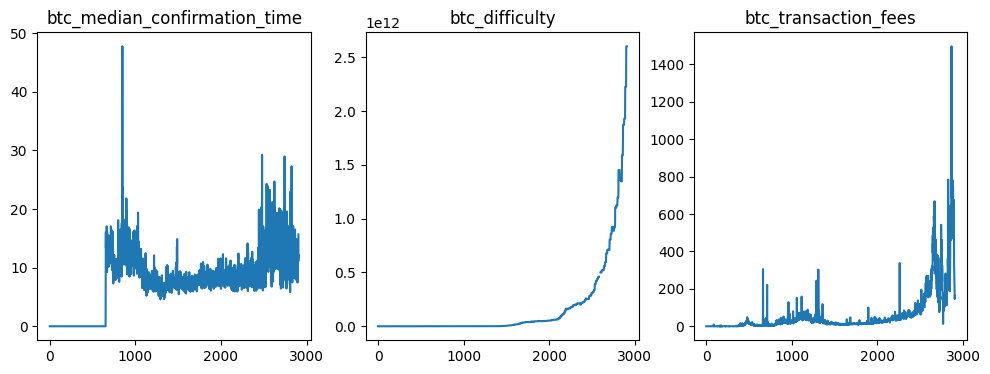

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(data['btc_median_confirmation_time'])
axes[0].set_title("btc_median_confirmation_time")

axes[1].plot(data['btc_difficulty'])
axes[1].set_title("btc_difficulty")

axes[2].plot(data['btc_transaction_fees'])
axes[2].set_title("btc_transaction_fees")

In [ ]:
data_new = data.fillna(method='ffill')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = data_new.drop(['Date','btc_market_price'], axis =1)
y = data_new['btc_market_price']

#split data
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 20)

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = {}
cv_s= {}

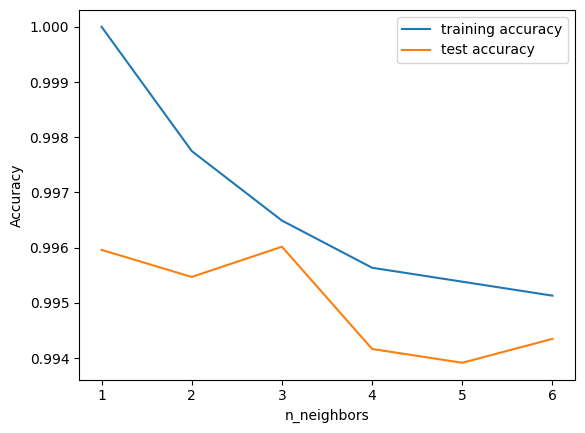

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
training_accuracy = []
test_accuracy = []
neighbor_seetings = range(1,7)

for x in neighbor_seetings:
    knr = KNeighborsRegressor(n_neighbors = x)
    knr.fit(X_train, y_train)
    training_accuracy.append(knr.score(X_train, y_train))
    test_accuracy.append(knr.score(X_test,y_test))

# Show the relationship of accuarcy and n_neighbors
plt.plot(neighbor_seetings, training_accuracy, label = 'training accuracy')
plt.plot(neighbor_seetings, test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel('n_neighbors')
plt.legend()


In [ ]:
# The best n_neighbors is 3
scores['K-neighbors regression'] = [training_accuracy[2],test_accuracy[2]]

In [ ]:
# Cross Validation
knr = KNeighborsRegressor(n_neighbors = 3)
cv_scores = cross_val_score(knr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(knr, X_test, y_test,cv = 5)
cv_s['K-neighbors regression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.98687909 0.98628578 0.99364222 0.99533167 0.99451667]
Mean cross-validation training score (5-fold): 0.991


In [ ]:
# Alpha by default is 1.0
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
print('Train score: {}'.format(ridge.score(X_train, y_train)))
print('Test score: {}'.format(ridge.score(X_test,y_test)))

Train score: 0.9965559318373166
Test score: 0.9943642875903984


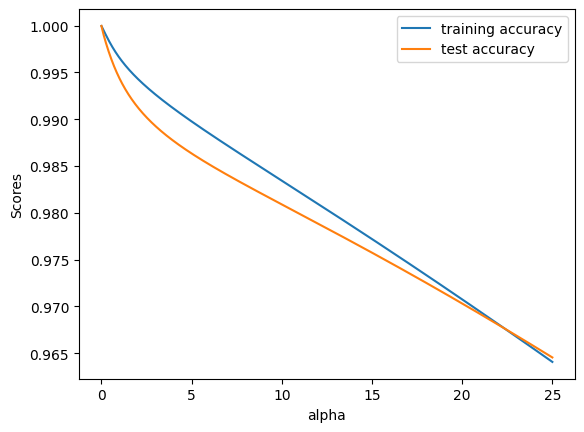

In [ ]:
a =np.linspace(0.001,25,1000)
training_accuracy = []
test_accuracy = []
for x in a:
    ridge = Ridge(alpha = x)
    ridge.fit(X_train, y_train)
    training_accuracy.append(ridge.score(X_train, y_train))
    test_accuracy.append(ridge.score(X_test,y_test))

plt.plot(a, training_accuracy, label = 'training accuracy')
plt.plot(a, test_accuracy, label = 'test accuracy')
plt.ylabel("Scores")
plt.xlabel('alpha')
plt.legend()

In [ ]:
# Use GridSearchCV to find the best alpha
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha':[0.001,0.01, 0.1,1]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

#use gridsearch to get the best parameters, alpha=0.001
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.001}
Best score 1.00


In [ ]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)
scores['Ridge']=[ridge.score(X_train, y_train),ridge.score(X_test,y_test)]

In [ ]:
cv_scores = cross_val_score(ridge, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(ridge, X_test, y_test,cv = 5)
cv_s['Ridge']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.99994032 0.99995757 0.99995691 0.99994587 0.99995854]
Mean cross-validation training score (5-fold): 1.000


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = 100000)
lasso.fit(X_train, y_train)
print('Train score: {}'.format(lasso.score(X_train, y_train)))
print('Test score: {}'.format(lasso.score(X_test,y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))

Train score: 0.9998857497412654
Test score: 0.9998914613577561
Number of features used: 7


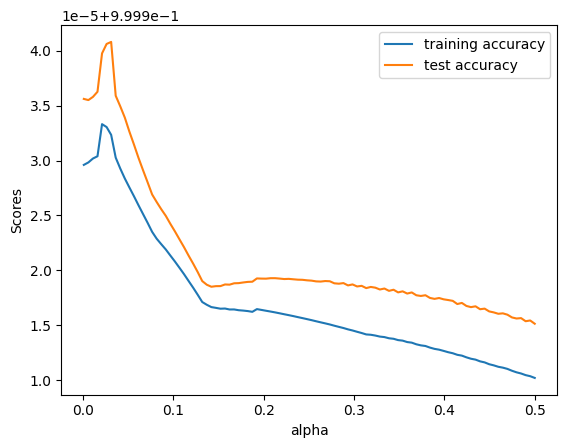

In [ ]:
a =np.linspace(0.001,0.5,100)
training_accuracy = []
test_accuracy = []
f = []
for x in a:
    lasso = Lasso(alpha = x, max_iter = 100000)
    lasso.fit(X_train, y_train)
    training_accuracy.append(lasso.score(X_train, y_train))
    test_accuracy.append(lasso.score(X_test,y_test))
    f.append(np.sum(lasso.coef_!=0))
plt.plot(a, training_accuracy, label = 'training accuracy')
plt.plot(a, test_accuracy, label = 'test accuracy')
plt.ylabel("Scores")
plt.xlabel('alpha')
plt.legend()


In [ ]:
lasso = Lasso(max_iter = 100000)
param_grid = {'alpha':[0.017, 0.02, 0.023, 0.026]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.023}
Best score 0.9999295558742451


In [ ]:
lasso = Lasso(alpha = 0.023,max_iter = 100000)
lasso.fit(X_train, y_train)
scores['Lasso']=[lasso.score(X_train, y_train),lasso.score(X_test,y_test)]


In [ ]:
# Cross Validation
cv_scores = cross_val_score(lasso, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(lasso, X_test, y_test,cv = 5)
cv_s['Lasso']=[np.mean(cv_scores),np.mean(cv_test_scores)]


Cross-validation training scores (5-fold): [0.9999232  0.99992983 0.99993671 0.99991814 0.9999399 ]
Mean cross-validation training score (5-fold): 1.000


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)
print('Train score: {}'.format(lr.score(X_train, y_train)))
print('Test score: {}'.format(lr.score(X_test,y_test)))
scores['LinearRegression']=[lr.score(X_train, y_train),lr.score(X_test,y_test)]

Train score: 0.9999556586937504
Test score: 0.999964899154559


In [ ]:
# Cross Validation
cv_scores = cross_val_score(lr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(lr, X_test, y_test,cv = 5)
cv_s['LinearRegression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.99994144 0.99995913 0.99995868 0.99994664 0.99995757]
Mean cross-validation training score (5-fold): 1.000


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_py, X_test_py, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 20)

linreg = LinearRegression()
linreg.fit(X_train_py, y_train)
print('Polynomial LinearRegression')
print('Train score: {}'.format(linreg.score(X_train_py, y_train)))
print('Test score: {}\n'.format(linreg.score(X_test_py,y_test)))
scores['Polynomial deg 2 LinearRegression']=[linreg.score(X_train_py, y_train),linreg.score(X_test_py,y_test)]

linridge = Ridge()
linridge.fit(X_train_py, y_train)
print('Polynomial Ridge Regression')
print('Train score: {}'.format(linridge.score(X_train_py, y_train)))
print('Test score: {}\n'.format(linridge.score(X_test_py,y_test)))
scores['Polynomial deg 2 Ridge Regression']=[linridge.score(X_train_py, y_train),linridge.score(X_test_py,y_test)]

linlasso = Lasso()
linlasso.fit(X_train_py, y_train)
print('Polynomial Lasso Regression')
print('Train score: {}'.format(linlasso.score(X_train_py, y_train)))
print('Test score: {}'.format(linlasso.score(X_test_py,y_test)))
scores['Polynomial deg 2 Lasso Regression']=[linlasso.score(X_train_py, y_train),linlasso.score(X_test_py,y_test)]


Polynomial LinearRegression
Train score: 0.9999877482832659
Test score: 0.999945743641954

Polynomial Ridge Regression
Train score: 0.9999751679535477
Test score: 0.9999448427914078

Polynomial Lasso Regression
Train score: 0.9999867023539635
Test score: 0.999974112132333


In [ ]:
cv_scores = cross_val_score(linreg, X_train_py, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(linreg, X_test_py, y_test,cv = 5)
cv_s['Polynomial deg 2 LinearRegression']=[np.mean(cv_scores),np.mean(cv_test_scores)]



Cross-validation training scores (5-fold): [0.99997536 0.99997252 0.9999708  0.99993429 0.99991266]
Mean cross-validation training score (5-fold): 1.000


svm


In [ ]:
from sklearn.svm import SVR
# SVM, with kernel: (linear)
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
print('Train score: {}'.format(svr.score(X_train, y_train)))
print('Test score: {}\n'.format(svr.score(X_test,y_test)))
scores['SVM']=[svr.score(X_train, y_train),svr.score(X_test,y_test)]

Train score: 0.1366138285955656
Test score: 0.13142701474512852



In [ ]:
cv_scores = cross_val_score(svr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(svr, X_test, y_test,cv = 5)
cv_s['SVM']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.12816375 0.11722022 0.121453   0.13193386 0.10290388]
Mean cross-validation training score (5-fold): 0.120


In [ ]:
# SVR without kernel
from sklearn.svm import LinearSVR
lsvr = LinearSVR()
lsvr.fit(X_train, y_train)
print('Train score: {}'.format(lsvr.score(X_train, y_train)))
print('Test score: {}\n'.format(lsvr.score(X_test,y_test)))
scores['SVM without kernel']=[lsvr.score(X_train, y_train),lsvr.score(X_test,y_test)]

Train score: 0.13664160024805005
Test score: 0.13145749697759723



In [ ]:
cv_scores = cross_val_score(lsvr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(lsvr, X_test, y_test,cv = 5)
cv_s['SVM without kernel']=[np.mean(cv_scores),np.mean(cv_test_scores)]


Cross-validation training scores (5-fold): [0.12835465 0.11680058 0.1212534  0.13181089 0.10343208]
Mean cross-validation training score (5-fold): 0.120


In [ ]:
df = pd.DataFrame(scores).T
df.columns = ['Train Score','Test Score']
df = pd.concat([df,pd.DataFrame(cv_s,index = [['Cross_Validation_Train_Score','Cross_Validation_Test_Score']]).T],axis=1, join='inner')
df

,Train Score,Test Score,"(Cross_Validation_Train_Score,)","(Cross_Validation_Test_Score,)"
K-neighbors regression,0.996492,0.996019,0.991331,0.978376
LinearRegression,0.999956,0.999965,0.999953,0.999957
Polynomial deg 2 LinearRegression,0.999988,0.999946,0.999953,0.988313
SVM,0.136614,0.131427,0.120335,0.025699
SVM without kernel,0.136642,0.131457,0.120330,0.025841
Lasso,0.999933,0.999940,0.999930,0.999923
Ridge,0.999955,0.999963,0.999952,0.999940


prediction


In [ ]:
poly = PolynomialFeatures(degree=2)
test_data = test.drop('Date',axis = 1)
test_poly = poly.fit_transform(test_data)
y_pred = linlasso.predict(test_poly)
r=pd.DataFrame()
r['btc_market_price before scale']=y_pred

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_py, X_test_py, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 20)
X_train_py = scaler.fit_transform(X_train_py)
X_test_py = scaler.transform(X_test_py)

linlasso = Lasso()
linlasso.fit(X_train_py, y_train)
print('Polynomial Lasso Regression')
print('Train score: {}'.format(linlasso.score(X_train_py, y_train)))
print('Test score: {}'.format(linlasso.score(X_test_py,y_test)))

Polynomial Lasso Regression
Train score: 0.9998945619610314
Test score: 0.9998988540655782


In [ ]:
test = pd.read_csv('test_set.csv')
test_data = test.drop('Date',axis = 1)
X_poly = poly.transform(test_data)
test_poly = scaler.transform(X_poly)
r['btc_market_price after scale'] = linlasso.predict(test_poly)

In [ ]:
r

,btc_market_price before scale,btc_market_price after scale
0,9099.921986,9136.020347
1,8875.222942,9003.339705
2,9044.489265,9174.150164
3,8326.734733,8582.665330
4,6836.485488,6974.159517
5,7730.150911,7770.067645
6,8085.951666,8153.761836
7,8183.653222,8320.466859
8,8513.888672,8616.173681
9,8290.446761,8405.952550
